# Import Libraries and mount drive

In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

# Download and import visualkeras library
!pip install visualkeras
import visualkeras

# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

2.8.0
     |████████████████████████████████| 992 kB 5.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/challenge/Task"

/content/drive/.shortcut-targets-by-id/1vrYek8X-gYU6ac4R9mnDnXgN5mVNxzns/Task


# Load data and plot them

In [4]:
from os import listdir
# from matplotlib import image
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.inception_v3 import InceptionV3 
from keras.models import Model
# load all images in a directory
anomaly = list()
names = []
t = 299
for filename in listdir('training/anomaly'):
	# img_data = image.imread('training/anomaly/' + filename, target_size=(299, 299))
	img = load_img('training/anomaly/' + filename, target_size=(t,t))
	img = np.array(img)
	img = img.reshape(1,t,t,3)
	img = tfk.applications.inception_v3.preprocess_input(img)
	anomaly.append(img)
	names.append(filename)
	

anomaly = np.array(anomaly)
print(anomaly.shape)

(452, 1, 299, 299, 3)


We just consider anomalies

In [5]:
Xtrain = anomaly

In [6]:
input_shape = Xtrain.shape[1:]
 # X_train.shape[:] = (num. of samples in training set, height, width, channels). We only care about the last two numbers.
print(input_shape)

(1, 299, 299, 3)


We decided to use the same model of the previous task, which was a neural network made of the encoder of the InceptionV3 and some Dense layers to deal with the classification problem.
Our aim now is to create a latent representation of the images of the dataset in order to reduce the dimensionality, so we get rid of the "decoder" part of the network.


In [7]:
model = InceptionV3()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

96124928/96112376 [==============================] - 1s 0us/step


In [8]:
import tqdm as tqdm

In [9]:
rep = np.zeros((452, 2048))
for i,anom in enumerate(tqdm.tqdm(anomaly)):
  rep[i,:] = model.predict(anom)
#rep is the dataset containing the latent representations of the images 

100%|██████████| 452/452 [02:33<00:00,  2.94it/s]


In [10]:
from numpy.core.shape_base import vstack
U, S, vt = np.linalg.svd(rep @ rep.T)
# we perform svd decomposition in order to find the principal components of the dataset 

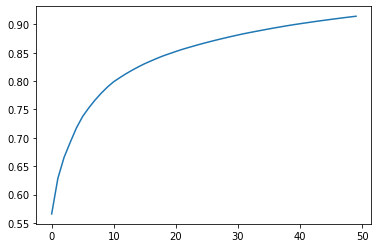

In [11]:
plt.plot(np.cumsum(S[:50])/np.sum(S))
#we just keep the first 50 pcs since they represent 90% of the variability of the dataset 

In [12]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=50)
new_data = pca.fit_transform(rep)

# Clustering algorithms:

## Kmeans

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=22, n_init =100)
kmeans.fit(new_data)

KMeans(n_clusters=3, n_init=100, random_state=22)

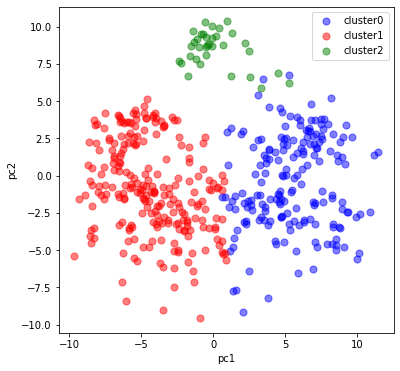

In [14]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")


ax.scatter(new_data[kmeans.labels_==0,0], new_data[kmeans.labels_==0,1], label ='cluster0', color = 'blue', alpha = 0.5, s = 50)
ax.scatter(new_data[kmeans.labels_==1,0], new_data[kmeans.labels_==1,1], label = 'cluster1', color = 'red', alpha = 0.5, s = 50)
ax.scatter(new_data[kmeans.labels_==2,0], new_data[kmeans.labels_==2,1], label = 'cluster2', color = 'green', alpha = 0.5, s = 50)
ax.legend()

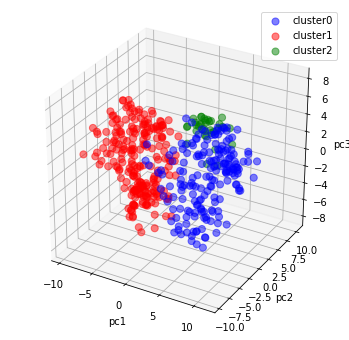

In [15]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")


ax.scatter(new_data[kmeans.labels_==0,0], new_data[kmeans.labels_==0,1], new_data[kmeans.labels_==0,2], label ='cluster0', color = 'blue', alpha = 0.5, s = 50)
ax.scatter(new_data[kmeans.labels_==1,0], new_data[kmeans.labels_==1,1], new_data[kmeans.labels_==1,2], label = 'cluster1', color = 'red', alpha = 0.5, s = 50)
ax.scatter(new_data[kmeans.labels_==2,0], new_data[kmeans.labels_==2,1], new_data[kmeans.labels_==2,2], label = 'cluster2', color = 'green', alpha = 0.5, s = 50)
ax.legend()


In [16]:
names2 = np.array(names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

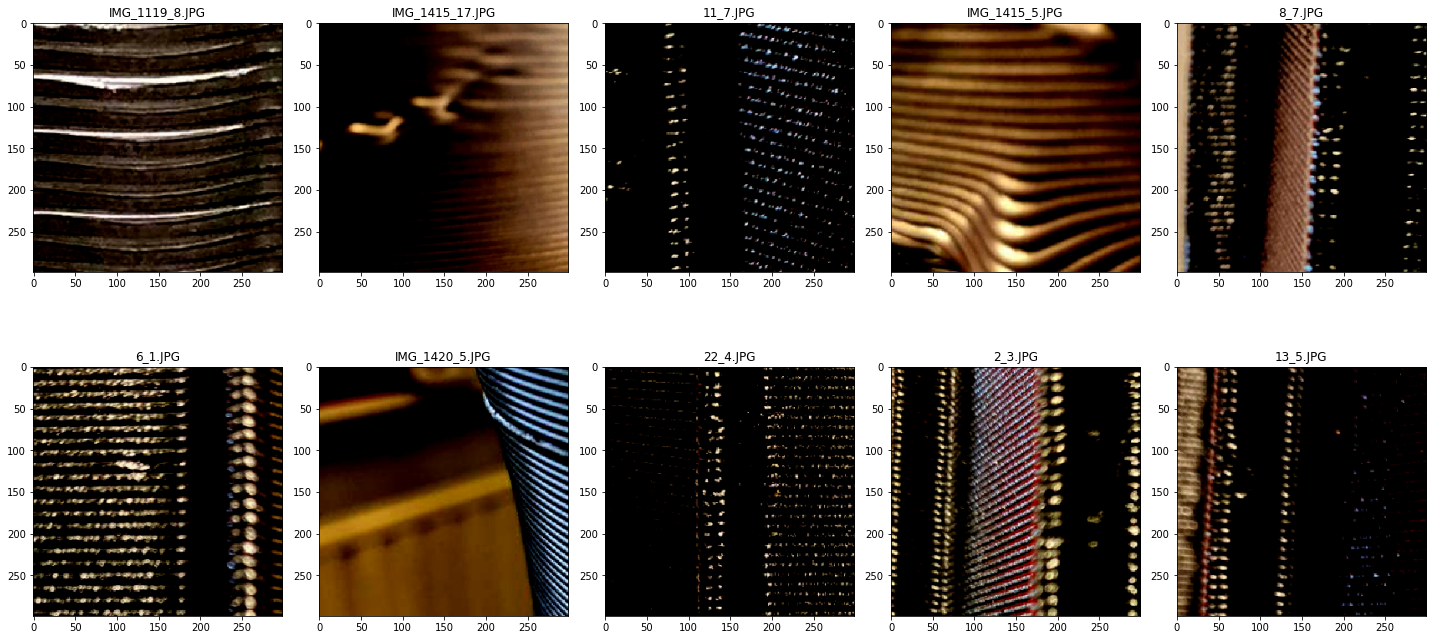

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


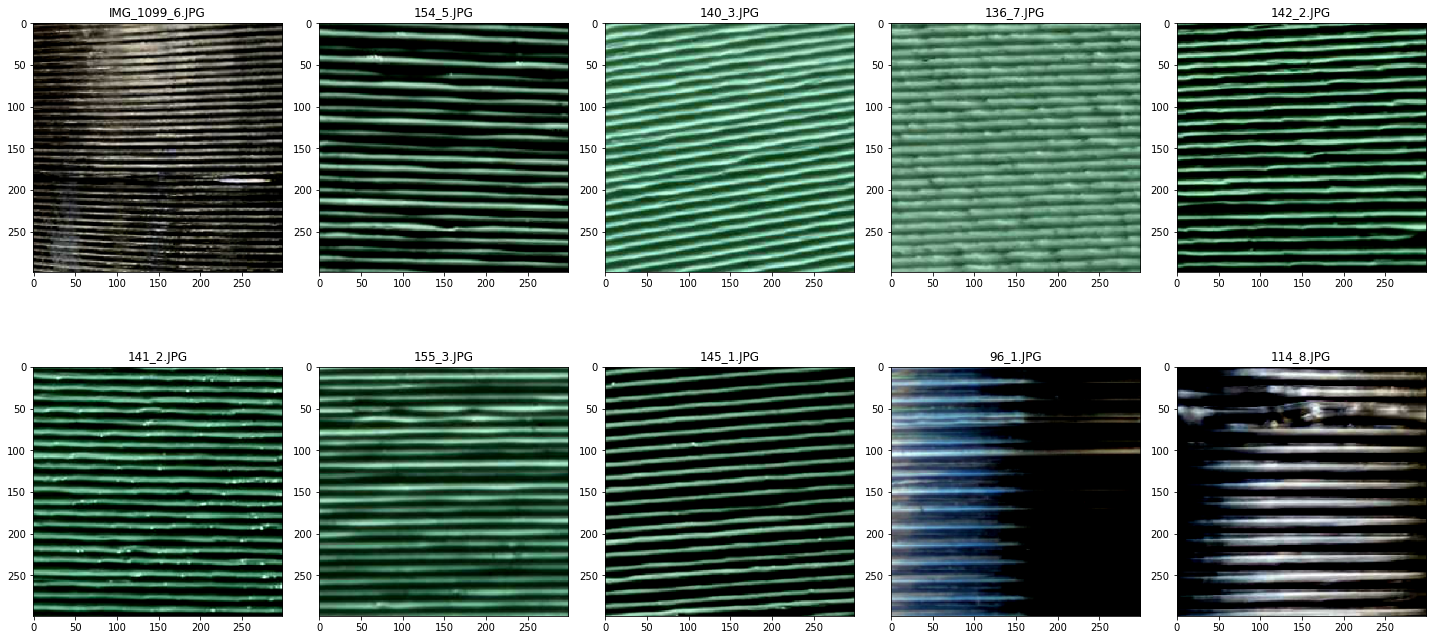

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

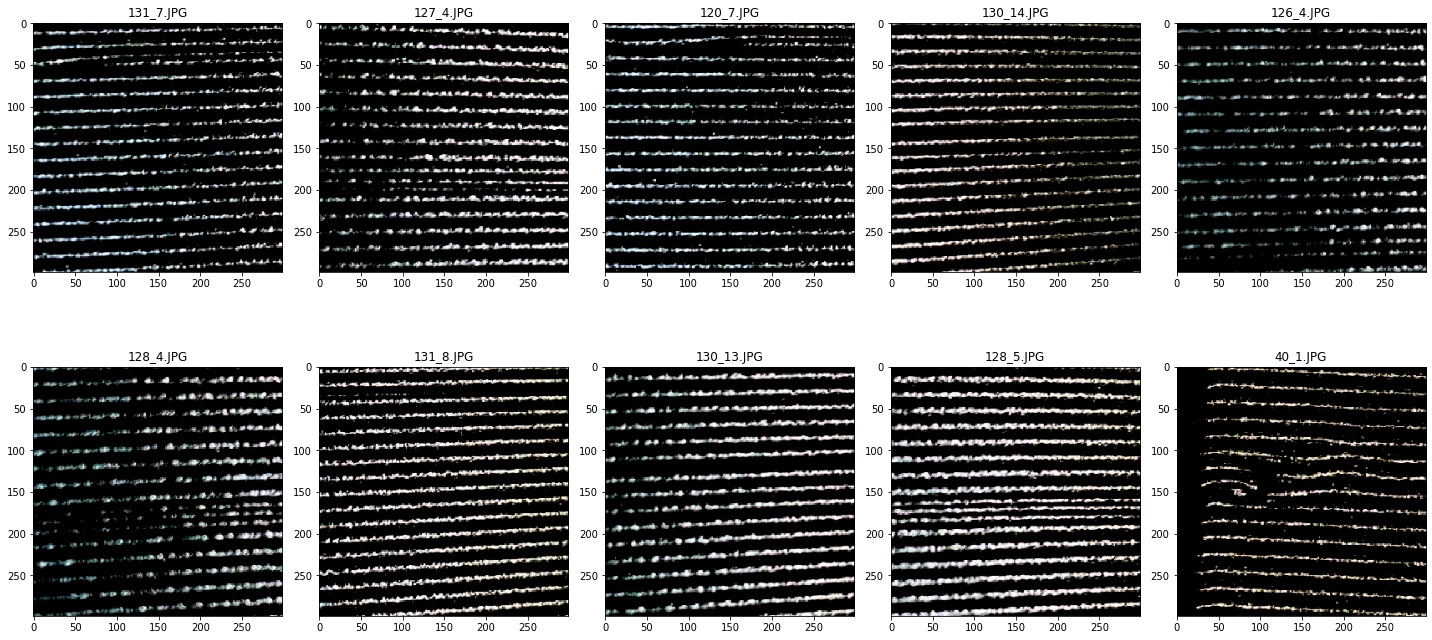

In [17]:
group0 = anomaly[kmeans.labels_==0]
group1 = anomaly[kmeans.labels_==1]
group2 = anomaly[kmeans.labels_==2]

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_row,2*num_col))

for i in range(10):
    ax = axes[i//num_col, i%num_col] # i//num_col è la divisione senza resto (quindi l'output dell'operazione è un intero)
                                     # i%num_col è il resto della divisione tra i e num_col
    ax.imshow(group0[i][0])
    coso = names2[kmeans.labels_==0]
    ax.set_title(coso[i])

plt.tight_layout() # to correctly space the plots
plt.show()


num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_row,2*num_col))

for i in range(10):
    ax = axes[i//num_col, i%num_col] # i//num_col è la divisione senza resto (quindi l'output dell'operazione è un intero)
                                     # i%num_col è il resto della divisione tra i e num_col
    ax.imshow(group1[i][0])
    ax.set_title(names2[kmeans.labels_==1][i])

plt.tight_layout() # to correctly space the plots

plt.show()


num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_row,2*num_col))

for i in range(10):
    ax = axes[i//num_col, i%num_col] # i//num_col è la divisione senza resto (quindi l'output dell'operazione è un intero)
                                     # i%num_col è il resto della divisione tra i e num_col
    ax.imshow(group2[i][0])
    ax.set_title(names2[kmeans.labels_==2][i])

plt.tight_layout() # to correctly space the plots
plt.show()




the groups seems to be formed by "similar" images

In [18]:
c0 = np.sum(kmeans.labels_==0)
c1 = np.sum(kmeans.labels_==1)
c2 = np.sum(kmeans.labels_==2)

In [19]:
print(c0,c1,c2)

183 235 34


## Agglomerative Clustering

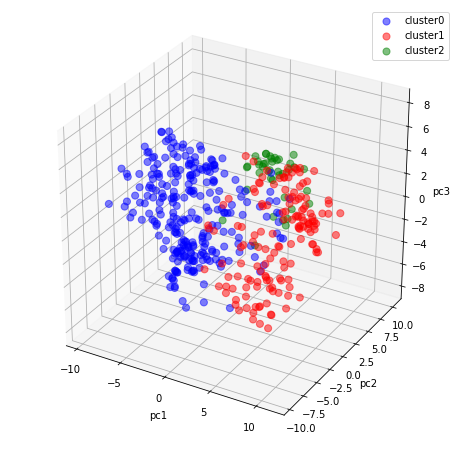

In [20]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(new_data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

#come si puo vedere dall'esempio in posizione 0 ho la distanza di 5 dal precedente sull'asse x e dal successivo sull'asse y
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")


ax.scatter(new_data[yhat==0,0], new_data[yhat==0,1], new_data[yhat==0,2], label ='cluster0', color = 'blue', alpha = 0.5, s = 50)
ax.scatter(new_data[yhat==1,0], new_data[yhat==1,1], new_data[yhat==1,2], label = 'cluster1', color = 'red', alpha = 0.5, s = 50)
ax.scatter(new_data[yhat==2,0], new_data[yhat==2,1], new_data[yhat==2,2], label = 'cluster2', color = 'green', alpha = 0.5, s = 50)
ax.legend()

In [23]:
def nltk_inertia(feature_matrix, centroid, cluster):
    sum_ = []
    numerosity = []
    for i in range(3):
      numerosity.append(sum(cluster==i))


    for i in range(feature_matrix.shape[0]):
        sum_.append(np.sum((feature_matrix[i] - centroid[cluster[i]])**2)/numerosity[cluster[i]])  

    return sum(sum_)

In [24]:
#Computation of the centroids and the inertia of the agglomerative clustering algo
centroid0 = np.mean(new_data[model.labels_==0,:], axis = 0)
centroid1 = np.mean(new_data[model.labels_==1,:], axis = 0)
centroid2 = np.mean(new_data[model.labels_==2,:], axis = 0)

centroids = [centroid0, centroid1, centroid2]
np.sqrt(nltk_inertia(new_data, centroids, model.labels_))

17.677845601725537

In [25]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.1 MB/s 


## Kmedoids

In [26]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(init = "heuristic", n_clusters=3).fit(new_data)


In [27]:
# inertia of the kmedoids algo
np.sqrt(nltk_inertia(new_data, kmedoids.cluster_centers_, kmedoids.labels_))

20.840493923657096

In [29]:
# inertia of kmeans 
np.sqrt(nltk_inertia(new_data, kmeans.cluster_centers_, kmeans.labels_))

16.861559192546668

We kept the kmeans algo since it has the lowest inertia

# Results

creation of the folders

In [30]:
import os 
exp_dir = "/content/drive/MyDrive/challenge"
clusters_dir = os.path.join(exp_dir, 'clusters')
if not os.path.exists(clusters_dir):
  os.makedirs(clusters_dir)

for i in range(3):
  cluster_dir = os.path.join(clusters_dir, 'Cluster_' + str(i+1))
  if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)

In [31]:
for i,anom in enumerate(anomaly):
  dir = os.path.join(clusters_dir, 'Cluster_' + str(kmeans.labels_[i]+1))
  np.save(os.path.join(dir, names[i]), anom[0], allow_pickle = False)
  path = os.path.join(dir, names[i])




In [32]:

for filename in listdir('/content/drive/MyDrive/challenge/clusters/Cluster_1'):
    ss = filename.split(".")
    ss = ss[0]
    old_file = os.path.join("/content/drive/MyDrive/challenge/clusters/Cluster_1", filename)
    new_file = os.path.join("/content/drive/MyDrive/challenge/clusters/Cluster_1", ss + ".JPG")
    os.rename(old_file, new_file)


for filename in listdir('/content/drive/MyDrive/challenge/clusters/Cluster_2'):
    ss = filename.split(".")
    ss = ss[0]
    old_file = os.path.join("/content/drive/MyDrive/challenge/clusters/Cluster_2", filename)
    new_file = os.path.join("/content/drive/MyDrive/challenge/clusters/Cluster_2", ss + ".JPG")
    os.rename(old_file, new_file)


for filename in listdir('/content/drive/MyDrive/challenge/clusters/Cluster_3'):
    ss = filename.split(".")
    ss = ss[0]
    old_file = os.path.join("/content/drive/MyDrive/challenge/clusters/Cluster_3", filename)
    new_file = os.path.join("/content/drive/MyDrive/challenge/clusters/Cluster_3", ss + ".JPG")
    os.rename(old_file, new_file)
